In [1]:
import sys
!{sys.executable} -m pip install scikit-learn==1.1
!conda install --yes --prefix {sys.prefix} scikit-learn==1.1

import pandas as pd
import os
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import sklearn.feature_extraction.text as sk_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator, RegressorMixin
from wordcloud import WordCloud
import numpy as np
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from collections import Counter
import nltk
from sklearn.metrics import roc_curve
import math
from sklearn.metrics import precision_recall_curve
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
nltk.download('wordnet')
nltk.download('omw-1.4')
path = '/Users/nikhil/data/ML_examples/erdos/'

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - scikit-learn==1.1

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




[nltk_data] Downloading package wordnet to /home/aniket/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/aniket/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Let us import the debate speech data and specify a list unwated words that must be romoved from the speech data. These words are moderator names and states names that are meaningless to our model. We will also define a list of election terms with their start and end dates.

In [2]:
speech_data = pd.read_csv('finaldata_party.csv')

election_term = [1960,1976,1980,1984,1988,1992,1996,2000,2004,2012,2016]
start_dates = ['1960-01-01','1976-01-01','1980-01-01','1984-01-01','1988-01-25','1992-01-01','1996-01-01','2000-01-01','2004-01-01','2012-01-01','2016-01-01']
end_dates = ['1976-01-01','1980-01-01','1984-01-01','1988-01-01','1992-01-01','1996-01-01','2000-01-01','2004-01-01','2008-01-01','2016-01-01','2022-01-01']

moderators = ['Dorothy Ridings', 'Sander Vanocur', 'John Mashek', 'Jack White',
       'Norma Quarles', 'Robert Boyd', 'Jim Lehrer', 'Ann Compton',
       'Moderator', 'Martha Raddatz', 'Bill Shadel', 'Frank McGee',
       'Charles Van Fremd', 'Douglass Cater', 'Rosco Drummond',
       'Bernard Shaw', 'Margaret Warner', 'Andrea Mitchell', 'Hal Bruno',
       'Bob Schieffer', 'Unknown', 'Carol Simpson', 'Question',
       'Kate Kelly', 'Gary Johnson', 'Bernie Sanders', 'Howard Smith',
       'Walter Cronkite', 'Candy Crowley', 'Audience', 'Helen Thomas',
       'Gene Gibbons', 'Chris Wallace', 'Quincy Howe', 'Frank Singiser',
       'John Edwards', 'John Chancellor', 'Edwin Newman', 'Georgie Geyer',
       'Marvin Kalb', 'Morton Kondracke', 'Barbara Walters',
       'Joseph Kraft', 'Robert Maynard', 'Jack Nelson', 'Marvin Stone',
       'Harry Ellis', 'William Hilliard', 'Elaine Quijano',
       'Judy Woodruff', 'Jon Margolis', 'Tom Brokaw', 'Brit Hume',
       'Gwen Ifill', 'Pauline Frederick', 'Max Frankel', 'Henry Trewitt',
       'Richard Valeriani', 'Paul Niven', 'Edward Morgan', 'Alvin Spivak',
       'Harold Levy', 'James Wieghart', 'Dianne Sawyer', 'Fred Barnes',
       'Charles Gibson', 'Anderson Cooper', 'John Anderson',
       'Bill Moyers', 'Carol Loomis', 'Daniel Greenberg',
       'Charles Corddry', 'Lee May', 'Washington Post', 'Bryant Quinn',
       'New York Times', 'Soma Golden', 'Frank Reynolds', 'James Gannon',
       'Elizabeth Drew', 'Anne Groer', 'Peter Jennings', 'Bob Fleming',
       'Stuart Novins', 'Charles Warren', 'Voiceover', 'Lester Holt',
       'Franchesca Ramsey', 'Connor Franta', 'Marques Brownlee',
       'Dana Bash', 'Don Lemon', 'Juan Carlos Lopez', 'David Muir',
       'Neil Levesque', 'Josh McElveen', 'Rachel Maddow',
       'Kristen Welker', 'Ashley Parker', 'Erin Burnett', 'Marc Lacey',
       'Jake Tapper', 'Marrianne Williamson', 'John King',
       'Nia-Malika Henderson', 'Michael Bennet', 'crowd',
       'George Stephanopoulos', 'Jorge Ramos', 'Lindsey Davis',
       'Wolf Blitzer', 'Abby Phillip', 'Brianne Pfannenstiel',
       'Hallie Jackson', 'Chuck Todd', 'Vanessa Hauc', 'Jon Ralston',
       'Protestors', 'Tim Alberta', 'Amna Nawaz', 'Yamiche Alcindor',
       'Savannah Guthrie', 'Jose Diaz', 'Steve Kornacki', 'Lindsey David',
       'Monica Hernandez', 'Adam Sexton', 'Linsey Davis', 'Devin Dwyer',
       'Rachel Scott', 'Announcer', 'Steve King', "Norah O'Donnell",
       'Candidate', 'Bill Whitaker', 'Major Garrett', 'Margaret Brennan',
       'Ilia Caldern', 'Sanjay Gupta', 'Amy Langenfeld', 'David Gergen',
       'Erick Erickson', 'Michelle Bachmann', 'Jim Demint',
       'Unidentified', 'Resident', 'Bret Baier', 'Gerald Seib',
       'Kelly Evans', 'Brian Williams', 'Shannon Bream', 'Rick Scott',
       'Maria Bartiromo', 'John Harwood', 'Jim Cramer', 'Steve Liesman',
       'Narrator', 'Doug Oberhelman', 'Rick Santelli', 'Sharon Epperson',
       'Matt Strawn', 'Protester', 'Hugh Hewitt', 'Susan Page ']

states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

states = list(states.values())
moderator_names = []
for w in moderators:
    for a in w.split():
        moderator_names.append(a.lower())

states_names = []
for w in states:
    for a in w.split():
        states_names.append(a.lower())

unwanted_names = moderator_names + states_names


Now we will define few functions that will be used in our final Pipeline. 

In [25]:
class Custom_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self,min_date,max_date,type):
        '''
        Inputs:
        min_date: Select the start date, format: "YYYY-MM-DD",(if None selects all dates)
        max_date: Select the end date, format: "YYYY-MM-DD",(if None selects all dates)
        type: List of debate types, e.g ['VP','Pres','Dem','Rep'],(if None all types will be considered)
        
        Output:
        Debate Date, Debate Type selected data frame which contains only the 'Democratic' and 'Republican' party debates
        with targets 0 for 'Republican' and 1 for 'Democratic'
        '''
        self.min_date = min_date
        self.max_date = max_date
        self.type = type
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.min_date!=None and self.max_date!=None:
            X['date'] = pd.to_datetime(X['date'])
            date_mask = (X['date'] > self.min_date) & (X['date'] <= self.max_date)
            masked_data = X.loc[date_mask]
        else:
            masked_data = X
    
        if self.type!=None:
            masked1_data = masked_data.loc[masked_data['type'].isin(self.type)]
        else:
            masked1_data = masked_data
        masked2_data = masked1_data.loc[masked_data['party'].isin(['R','D'])]
        masked2_data.loc[masked2_data['party'] == 'R', 'party'] = 0
        masked2_data.loc[masked2_data['party'] == 'D', 'party'] = 1
        masked2_data['party'] = masked2_data['party'].astype(int)
        return masked2_data
        
def get_custom_stopwords(df_new,unwanted_names):
    all_Text = df_new['text']
    Tfidf = sk_text.TfidfVectorizer(lowercase=True,analyzer='word',stop_words='english',ngram_range=(1,1))
    Tfidf.fit_transform(all_Text)
    all_words = Tfidf.get_feature_names_out()
    numeric_words = []
    for w in all_words:
        if not w.isalpha():
           numeric_words.append(w)

    candidates = df_new['speaker'].unique()
    candidate_names = []
    for w in candidates:
        for a in w.split():
            candidate_names.append(a.lower())
        
    stop_words = stopwords.words('english')
    custom_stopwords = stop_words + numeric_words + candidate_names + unwanted_names
    return custom_stopwords

def lemmatizing_function(df, col_name, stopwords):
    lemmatizer = WordNetLemmatizer()
    # Input is the dataframe, the column name containing the text and the list of stopwords
    lemmata = []
    for obs in df[col_name]:
        # Tokenizing the string in the observation
        lemma = []
        words = word_tokenize(obs)
        # Iterating through the words
        for word in words:
            # Checking if not in stop words
            if word.lower() not in stopwords:
                w1 = lemmatizer.lemmatize(word.lower(), pos='n')
                w2 = lemmatizer.lemmatize(w1, pos = 'v')
                w3 = lemmatizer.lemmatize(w2, pos='a')
                lemma.append(w3)
                
        # Combining into a sentence
        new = ' '.join(lemma)
        # Appending to the list of observations
        lemmata.append(new)
    # Appending to the dataframe
    name = col_name + '_lemma'
    df[name] = lemmata
    return df

def transform_custom_text(custom,custom_stopwords):
    custom_test = pd.DataFrame(custom, columns=['text'])
    custom_test_lemmatized = lemmatizing_function(custom_test,'text',custom_stopwords)
    return custom_test_lemmatized

def political_sentiment_analysis_pipeline(speech_data,election_term,start_dates,end_dates,custom_text,unwanted_names,classifier):
    recall = {}
    precision = {}
    accuracy = {}
    f1score = {}
    recall_train = {}
    precision_train = {}
    accuracy_train = {}
    f1score_train = {}
    custom_thresholds = {}
    democratic_probability = np.zeros((len(election_term),len(custom_text)))
    for i in range(0,len(start_dates)):
        term = election_term[i]
        start = start_dates[i]
        end = end_dates[i]
        Transformer = Custom_Transformer(min_date=start,max_date=end,type=['Pres','VP'])
        df_new = Transformer.fit_transform(speech_data)
        Tfidf = sk_text.TfidfVectorizer(max_features=int(len(df_new)*0.7 - 10),lowercase=True,stop_words='english',analyzer='word',ngram_range=(1,1))
        custom_stopwords = get_custom_stopwords(df_new,unwanted_names)
        lemmatized_df = lemmatizing_function(df_new,'text',custom_stopwords)
        df_train,df_test = train_test_split(lemmatized_df.copy(),test_size=0.3, random_state=42,stratify=lemmatized_df['party'])
        X = df_train['text_lemma']
        y = df_train['party']
        X_test = df_test['text_lemma']
        y_test = df_test['party']
        Tfidf.fit_transform(df_train['text_lemma'])
        Party_classifier = Pipeline([("Tfidf vectorizer",Tfidf),("classifier",classifier)])
        Party_classifier.fit(X,y)
        y_predict = Party_classifier.predict(X_test)
        y_predict_prob = Party_classifier.predict_proba(X_test)[:,1]
        y_predict_train = Party_classifier.predict(X)
        y_predict_train_prob = Party_classifier.predict_proba(X)[:,1]
        test_metrics = [precision_score(y_test,y_predict), recall_score(y_test,y_predict), f1_score(y_test,y_predict), accuracy_score(y_test,y_predict)]
        train_metrics = [precision_score(y,y_predict_train), recall_score(y,y_predict_train), f1_score(y,y_predict_train), accuracy_score(y,y_predict_train)]
        recall[term] = recall_score(y_test,y_predict)
        precision[term] = precision_score(y_test,y_predict)
        f1score[term] = f1_score(y_test,y_predict)
        accuracy[term] = accuracy_score(y_test,y_predict)
        recall_train[term] = recall_score(y,y_predict_train)
        precision_train[term] = precision_score(y,y_predict_train)
        f1score_train[term] = f1_score(y,y_predict_train)
        accuracy_train[term] = accuracy_score(y,y_predict_train)
        custom_test_lemmatized = transform_custom_text(custom_text,custom_stopwords)
        precision_t, recall_t, thresholds_t = precision_recall_curve(y_test, y_predict_prob)
        fscore_t = (2 * precision_t * recall_t) / (precision_t + recall_t)
        ix_fscore = np.argmax(fscore_t)
        custom_thresholds[term] = thresholds_t[ix_fscore]
        y_custom = Party_classifier.predict_proba(custom_test_lemmatized['text_lemma'])[:,1]
        democratic_probability[i,:] = y_custom
        
    print(custom_test_lemmatized['text_lemma'])
    return democratic_probability, recall, recall_train, precision, precision_train, f1score, f1score_train, accuracy, accuracy_train, custom_thresholds


The code will take in a list of custom words or text and output the probability of that word/text belonging to the Democratic party $P(D)$ as a function of time (from 1960-2020). Note that the data is only used for Republican and Democraatic party so probability of word belonging to Republicaan party $P(R) = 1 - P(D)$. 

In [27]:
custom_text = ['We believe in democracy','Radical and conservative'
               ,'Time to withdraw from syria','Russia'
               ,'Climate change is real','Illegal immigrants'
               ,'Environmental awareness','Tax the rich'
               ,'Recession could hit anytime']
custom_text1 = ['Make america great again','Gender identity'
               ,'Love is love','China and India','Russia'
               ,'Climate change is real','Illegal immigrants'
               ,'Environmental awareness','Tax the rich'
               ,'Recession could hit anytime']

MNB = MultinomialNB()
RF = RandomForestClassifier()
democratic_probability,rc,rc_tr,pr,pr_tr,f1,f1_tr,acc,acc_tr,custom_thresholds = political_sentiment_analysis_pipeline(speech_data,election_term,start_dates,end_dates,custom_text,unwanted_names,MNB)


/home/aniket/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-25-f55b8aab3f8e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masked2_data['party'] = masked2_data['party'].astype(int)


0              believe democracy
1           radical conservative
2            time withdraw syria
3                         russia
4            climate change real
5              illegal immigrant
6        environmental awareness
7                       tax rich
8    recession could hit anytime
Name: text_lemma, dtype: object


Lets plot the probability of the first 6 text/words as a function of time.

In [16]:
custom_thresholds

{1960: 0.48672957641913517,
 1976: 0.5774556721767192,
 1980: 0.3396926450767809,
 1984: 0.54162453988874,
 1988: 0.4490147253434573,
 1992: 0.3739340152837481,
 1996: 0.3801434350362196,
 2000: 0.43772207131048924,
 2004: 0.5635709238162434,
 2012: 0.42407640563651416,
 2016: 0.45144556370800615}

IndexError: index 4 is out of bounds for axis 1 with size 4

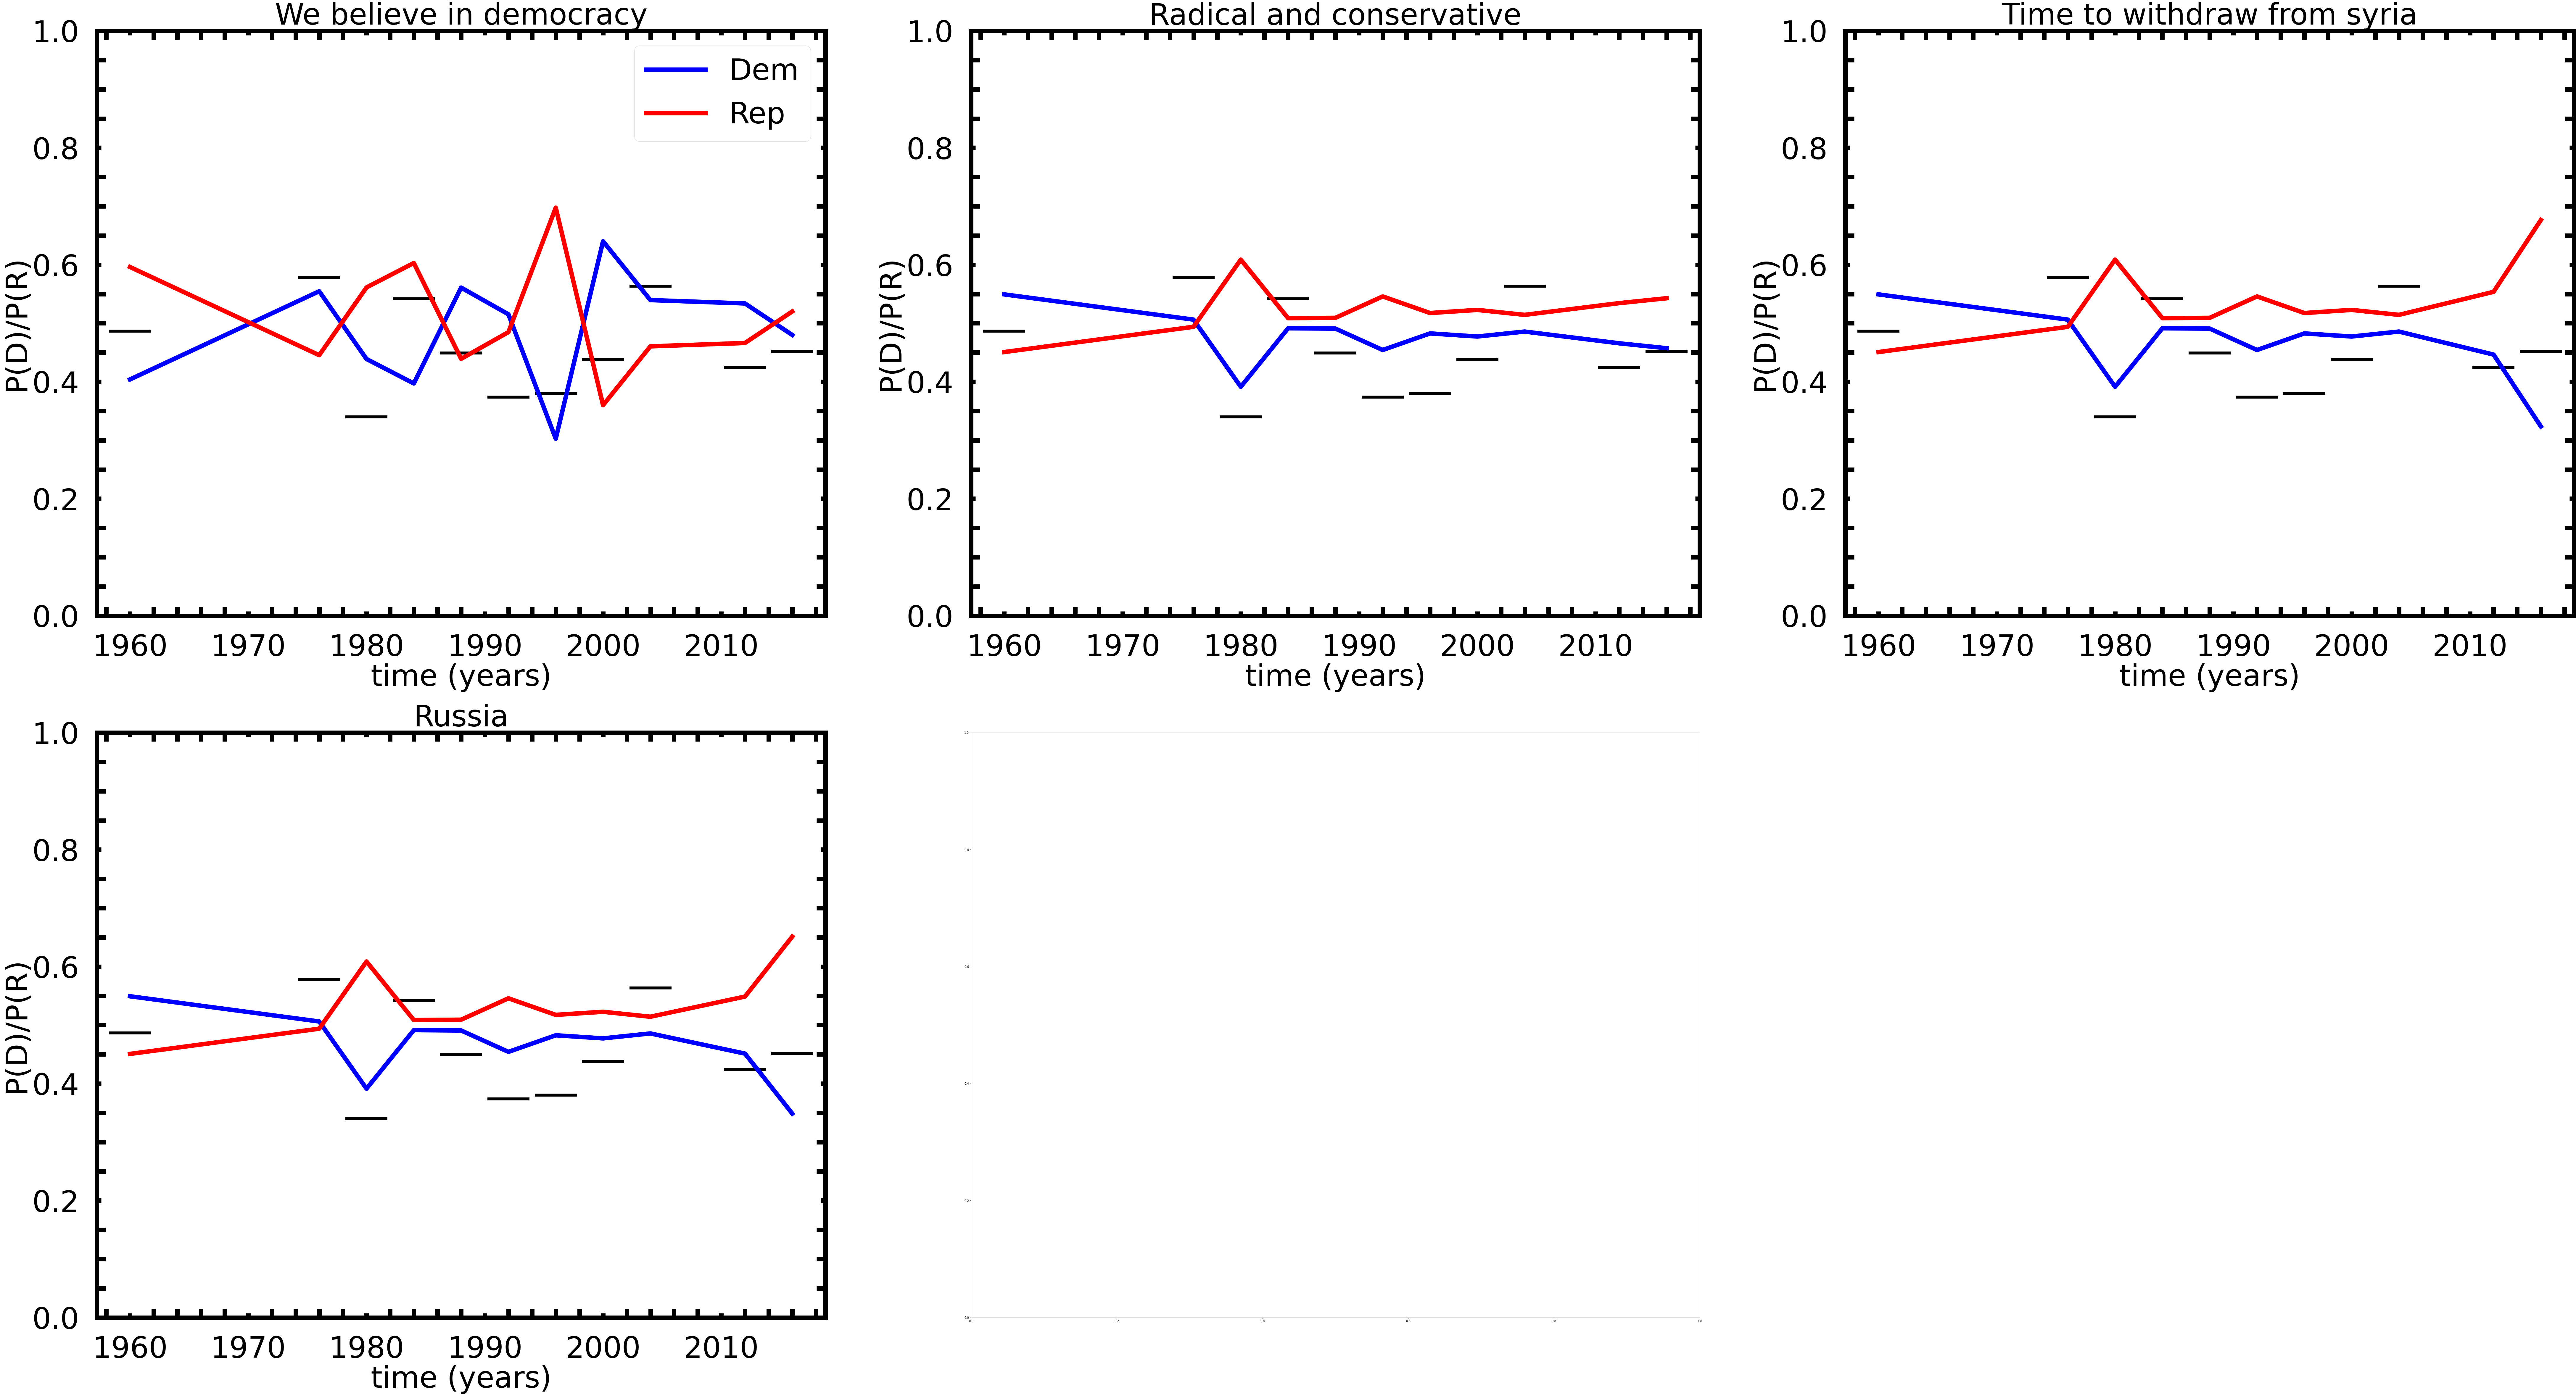

In [17]:
f = plt.figure(figsize=(150,80))

ft = 100
lw = 15
ltw = 15
ltwm= 30
pad_space=60
lz=100
ms=20000

ax1 = f.add_subplot(231)
ax1.plot(election_term,democratic_probability[:,0],c='b',linewidth=lw,label='Dem')
ax1.plot(election_term,1-democratic_probability[:,0],c='r',linewidth=lw,label='Rep')
ax1.scatter(election_term,list(custom_thresholds.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax1.plot()
ax1.set_ylabel('P(D)/P(R)',fontsize=ft)
ax1.set_xlabel('time (years)',fontsize=ft)
ax1.set_title(custom_text[0],fontsize=ft)
ax1.legend(fontsize=ft)
ax1.minorticks_on()
ax1.set_ylim([0,1])
ax1.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax1.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(lw)

ax2 = f.add_subplot(232)
ax2.plot(election_term,democratic_probability[:,1],c='b',linewidth=lw)
ax2.plot(election_term,1-democratic_probability[:,1],c='r',linewidth=lw)
ax2.scatter(election_term,list(custom_thresholds.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax2.set_ylabel('P(D)/P(R)',fontsize=ft)
ax2.set_xlabel('time (years)',fontsize=ft)
ax2.set_title(custom_text[1],fontsize=ft)
ax2.minorticks_on()
ax2.set_ylim([0,1])
ax2.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax2.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(lw)

ax3 = f.add_subplot(233)
ax3.plot(election_term,democratic_probability[:,2],c='b',linewidth=lw)
ax3.plot(election_term,1-democratic_probability[:,2],c='r',linewidth=lw)
ax3.scatter(election_term,list(custom_thresholds.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax3.set_ylabel('P(D)/P(R)',fontsize=ft)
ax3.set_xlabel('time (years)',fontsize=ft)
ax3.set_title(custom_text[2],fontsize=ft)
ax3.minorticks_on()
ax3.set_ylim([0,1])
ax3.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax3.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax3.spines[axis].set_linewidth(lw)

ax4 = f.add_subplot(234)
ax4.plot(election_term,democratic_probability[:,3],c='b',linewidth=lw)
ax4.plot(election_term,1-democratic_probability[:,3],c='r',linewidth=lw)
ax4.scatter(election_term,list(custom_thresholds.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax4.set_ylabel('P(D)/P(R)',fontsize=ft)
ax4.set_xlabel('time (years)',fontsize=ft)
ax4.set_title(custom_text[3],fontsize=ft)
ax4.minorticks_on()
ax4.set_ylim([0,1])
ax4.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax4.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax4.spines[axis].set_linewidth(lw)

ax5 = f.add_subplot(235)
ax5.plot(election_term,democratic_probability[:,4],c='b',linewidth=lw)
ax5.plot(election_term,1-democratic_probability[:,4],c='r',linewidth=lw)
ax5.scatter(election_term,list(custom_thresholds.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax5.set_ylabel('P(D)/P(R)',fontsize=ft)
ax5.set_xlabel('time (years)',fontsize=ft)
ax5.set_title(custom_text[4],fontsize=ft)
ax5.minorticks_on()
ax5.set_ylim([0,1])
ax5.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax5.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax5.spines[axis].set_linewidth(lw)

ax6 = f.add_subplot(236)
ax6.plot(election_term,democratic_probability[:,5],c='b',linewidth=lw)
ax6.plot(election_term,1-democratic_probability[:,5],c='r',linewidth=lw)
ax6.scatter(election_term,list(custom_thresholds.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax6.set_ylabel('P(D)/P(R)',fontsize=ft)
ax6.set_xlabel('time (years)',fontsize=ft)
ax6.set_title(custom_text[5],fontsize=ft)
ax6.minorticks_on()
ax6.set_ylim([0,1])
ax6.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax6.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax6.spines[axis].set_linewidth(lw)


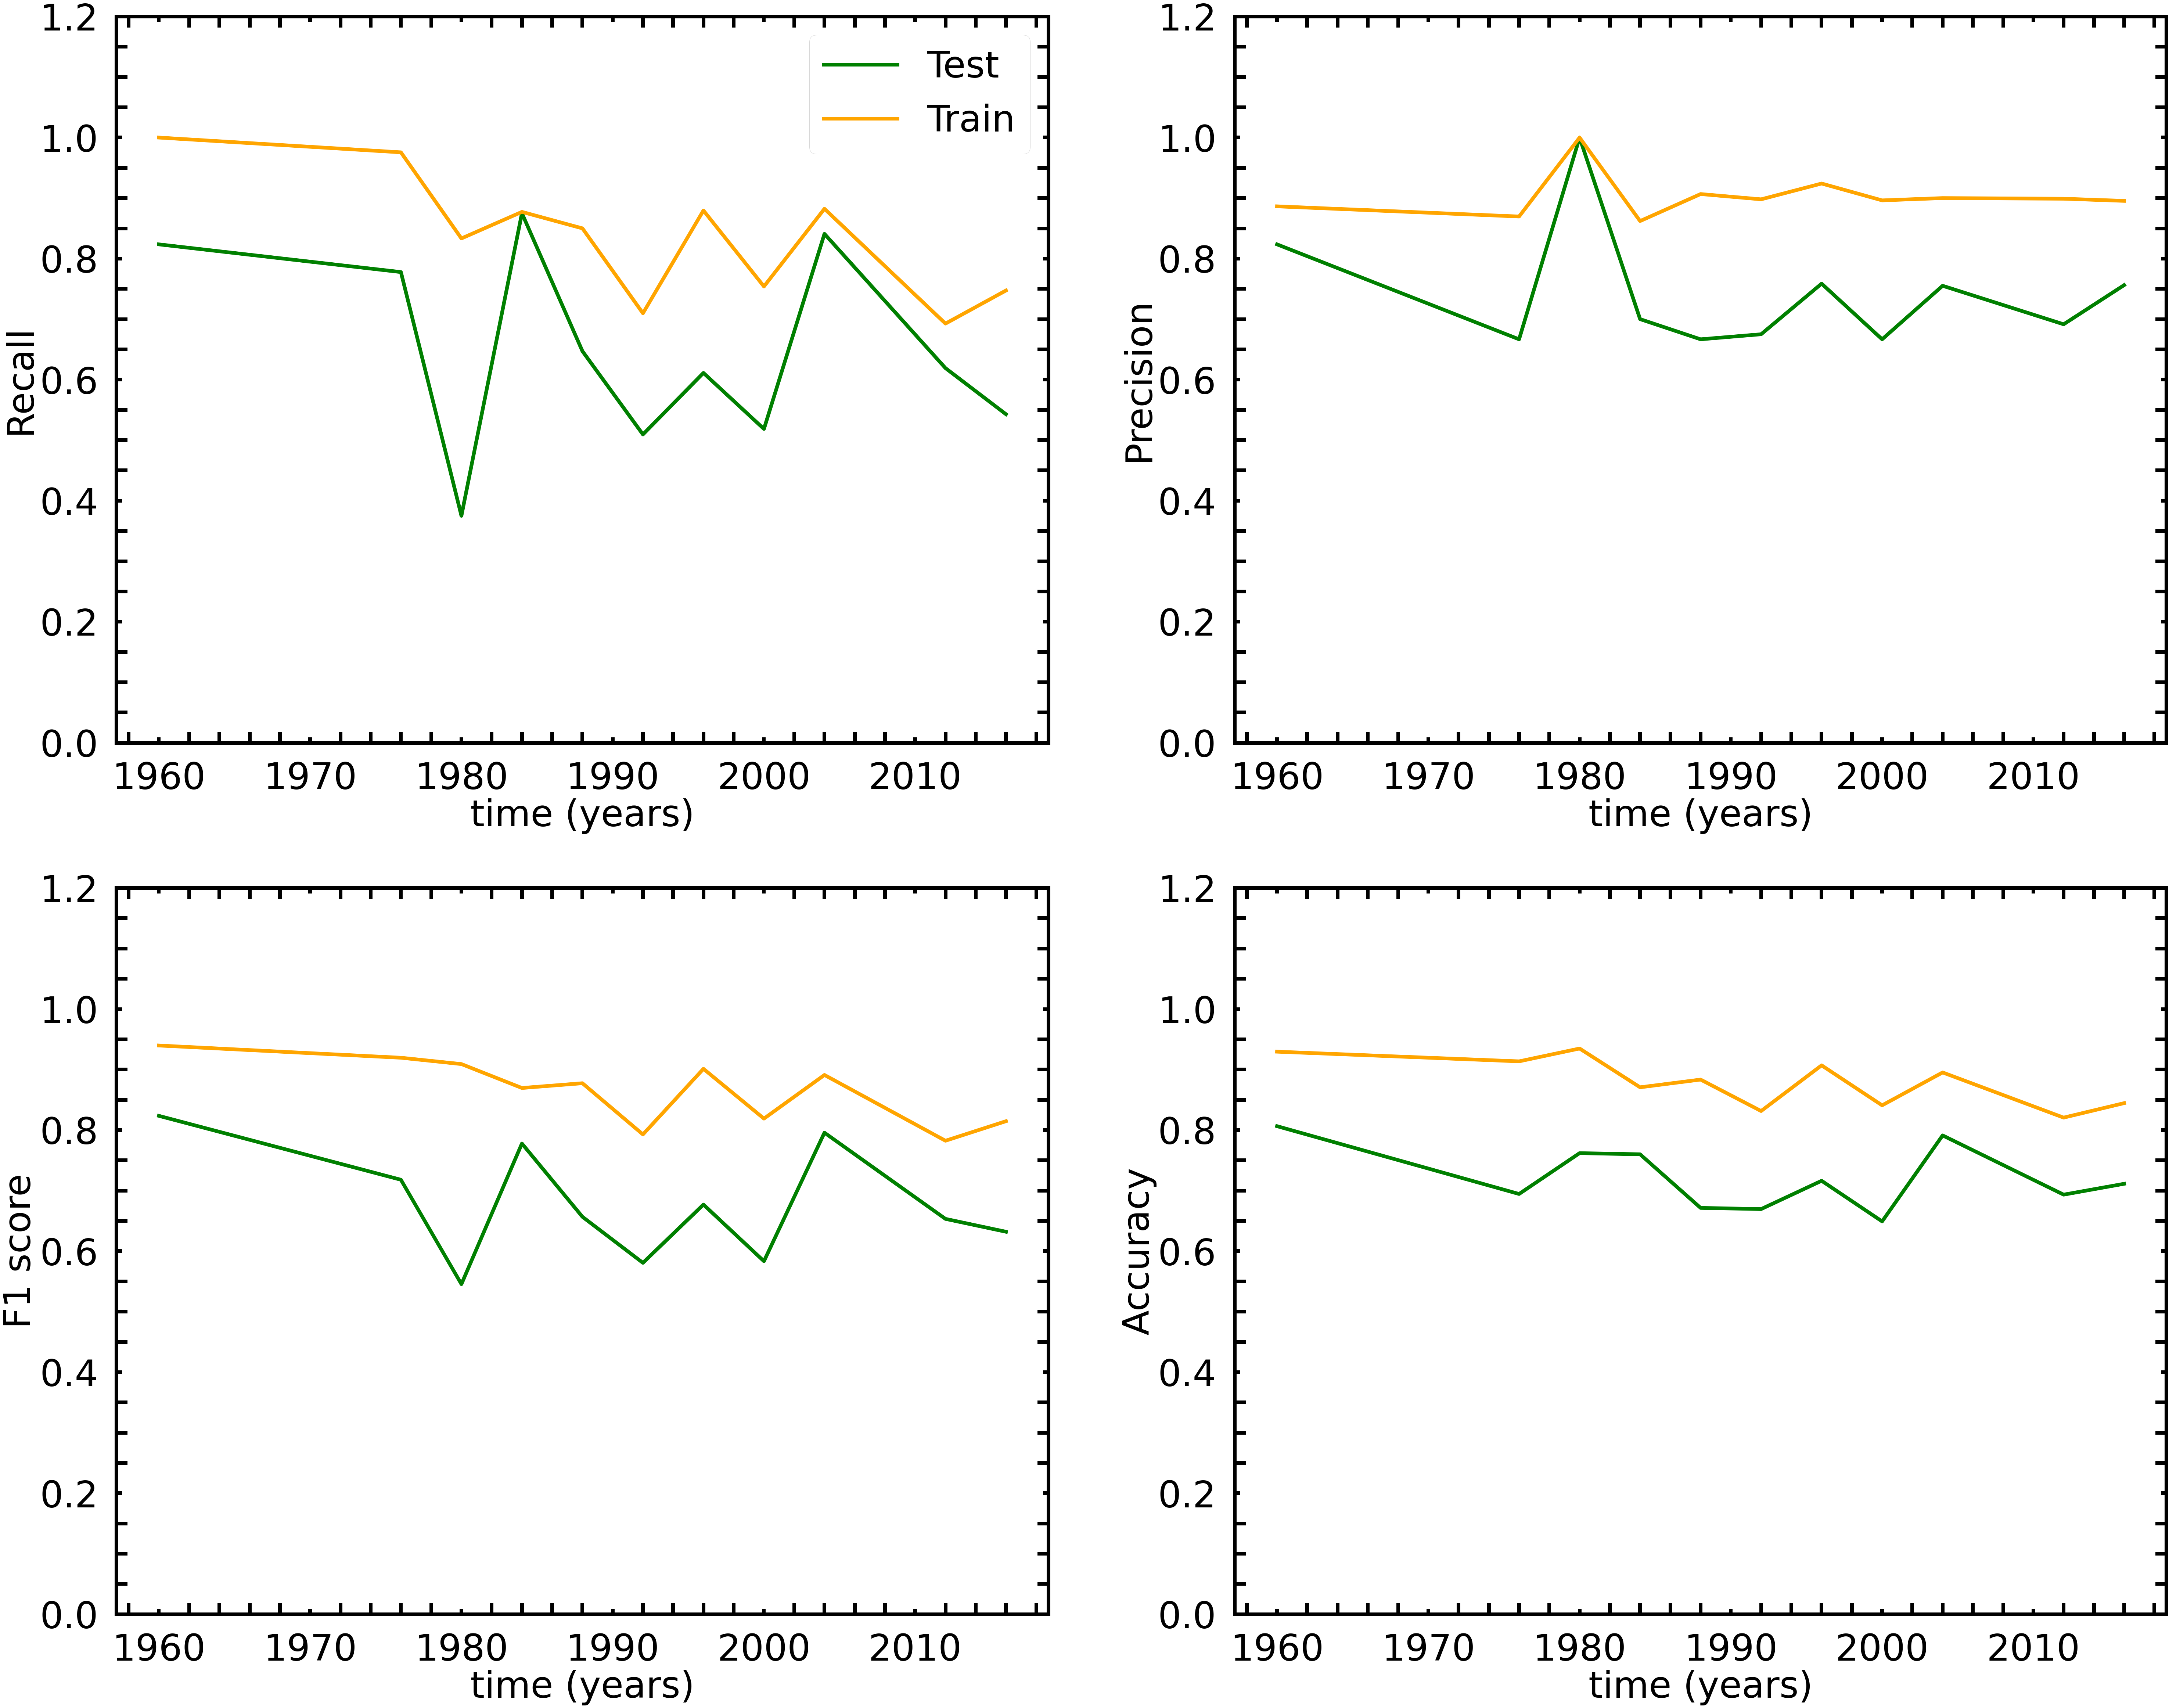

In [13]:
f = plt.figure(figsize=(100,80))

ft = 100
lw = 10
ltw = 15
ltwm= 30
pad_space=50
lz=100

ax1 = f.add_subplot(221)
ax1.plot(election_term,list(rc.values()),c='g',linewidth=lw,label='Test')
ax1.plot(election_term,list(rc_tr.values()),c='orange',linewidth=lw,label='Train')
ax1.set_ylabel('Recall',fontsize=ft)
ax1.set_xlabel('time (years)',fontsize=ft)
ax1.legend(fontsize=ft)
ax1.minorticks_on()
ax1.set_ylim([0,1.2])
ax1.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax1.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(lw)

ax2 = f.add_subplot(222)
ax2.plot(election_term,list(pr.values()),c='g',linewidth=lw)
ax2.plot(election_term,list(pr_tr.values()),c='orange',linewidth=lw)
ax2.set_ylabel('Precision',fontsize=ft)
ax2.set_xlabel('time (years)',fontsize=ft)
ax2.minorticks_on()
ax2.set_ylim([0,1.2])
ax2.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax2.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(lw)

ax3 = f.add_subplot(223)
ax3.plot(election_term,list(f1.values()),c='g',linewidth=lw)
ax3.plot(election_term,list(f1_tr.values()),c='orange',linewidth=lw)
ax3.set_ylabel('F1 score',fontsize=ft)
ax3.set_xlabel('time (years)',fontsize=ft)
ax3.minorticks_on()
ax3.set_ylim([0,1.2])
ax3.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax3.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax3.spines[axis].set_linewidth(lw)

ax4 = f.add_subplot(224)
ax4.plot(election_term,list(acc.values()),c='g',linewidth=lw)
ax4.plot(election_term,list(acc_tr.values()),c='orange',linewidth=lw)
ax4.set_ylabel('Accuracy',fontsize=ft)
ax4.set_xlabel('time (years)',fontsize=ft)
ax4.minorticks_on()
ax4.set_ylim([0,1.2])
ax4.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax4.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax4.spines[axis].set_linewidth(lw)


In [8]:
democratic_probability_rf,rc_rf,rc_tr_rf,pr_rf,pr_tr_rf,f1_rf,f1_tr_rf,acc_rf,acc_tr_rf,custom_thresholds_rf = political_sentiment_analysis_pipeline(speech_data,election_term,start_dates,end_dates,custom_text,unwanted_names,RF)


/home/aniket/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-3-18bd584dab47>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masked2_data['party'] = masked2_data['party'].astype(int)
<ipython-input-3-18bd584dab47>:132: RuntimeWarning: invalid value encountered in true_divide
  fscore_t = (2 * precision_t * recall_t) / (precision_t + recall_t)
<ipython-input-3-18bd584dab47>:132: Runtime

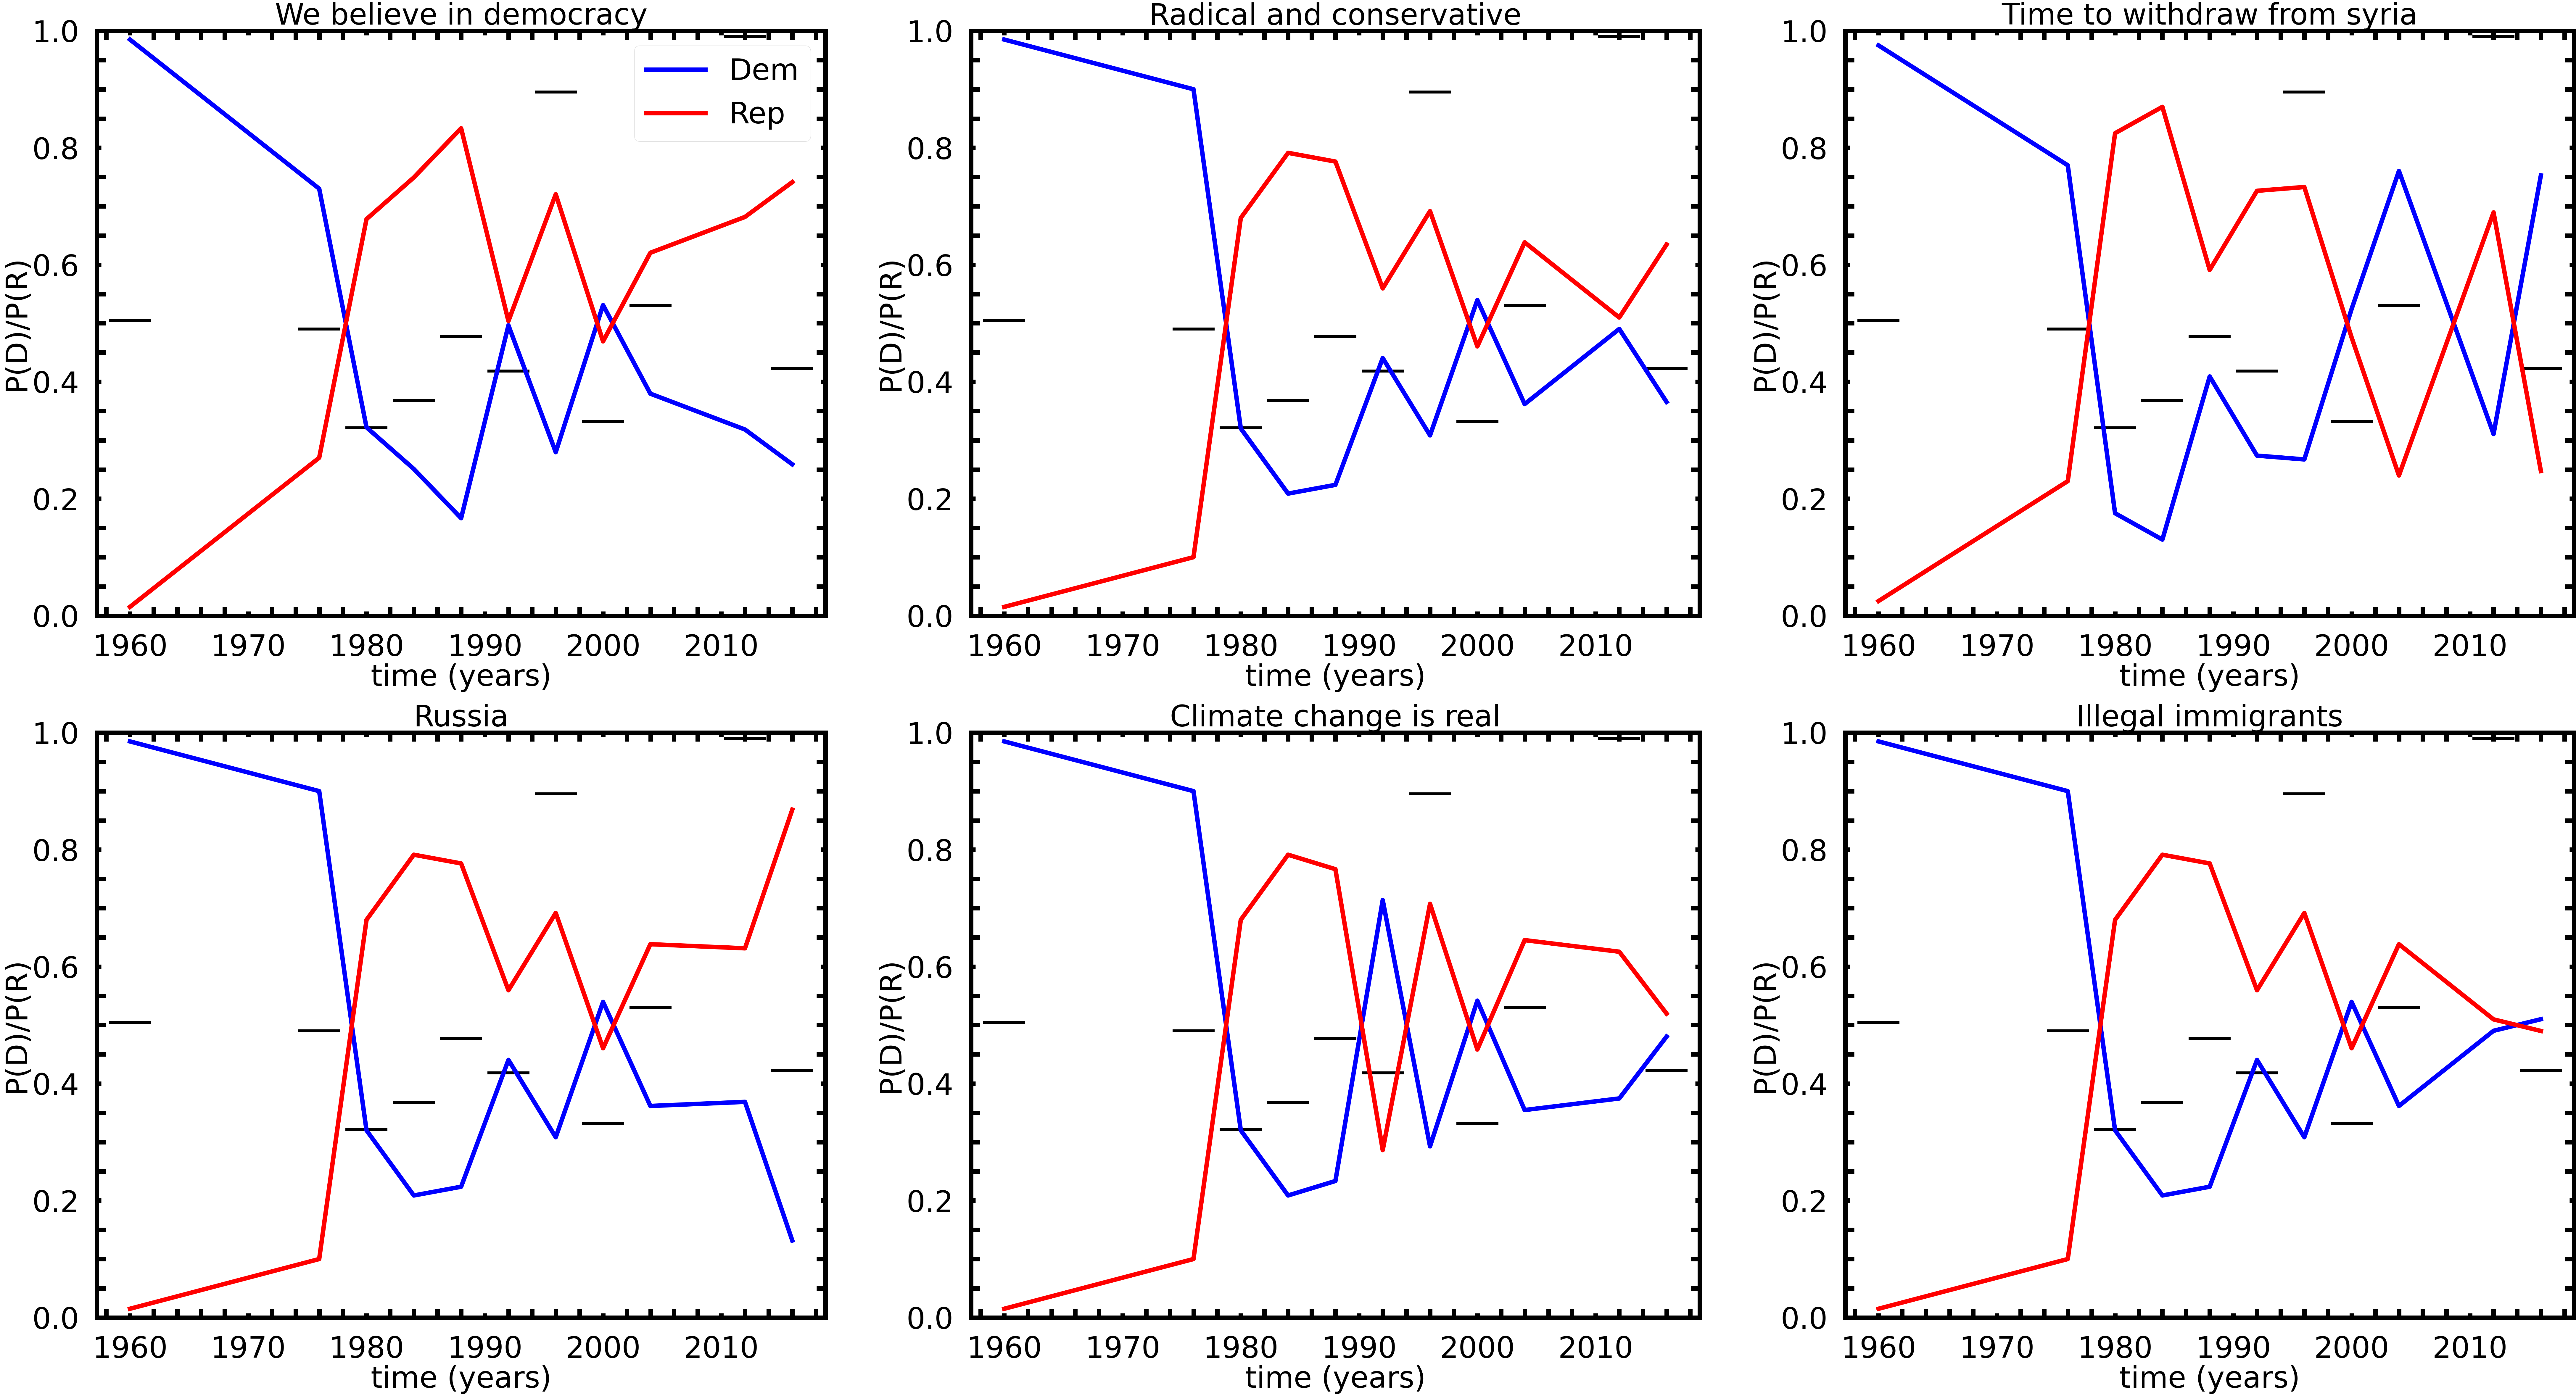

In [9]:
f = plt.figure(figsize=(150,80))

ft = 100
lw = 15
ltw = 15
ltwm= 30
pad_space=60
lz=100
ms=20000

ax1 = f.add_subplot(231)
ax1.plot(election_term,democratic_probability_rf[:,0],c='b',linewidth=lw,label='Dem')
ax1.plot(election_term,1-democratic_probability_rf[:,0],c='r',linewidth=lw,label='Rep')
ax1.scatter(election_term,list(custom_thresholds_rf.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax1.plot()
ax1.set_ylabel('P(D)/P(R)',fontsize=ft)
ax1.set_xlabel('time (years)',fontsize=ft)
ax1.set_title(custom_text[0],fontsize=ft)
ax1.legend(fontsize=ft)
ax1.minorticks_on()
ax1.set_ylim([0,1])
ax1.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax1.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(lw)

ax2 = f.add_subplot(232)
ax2.plot(election_term,democratic_probability_rf[:,1],c='b',linewidth=lw)
ax2.plot(election_term,1-democratic_probability_rf[:,1],c='r',linewidth=lw)
ax2.scatter(election_term,list(custom_thresholds_rf.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax2.set_ylabel('P(D)/P(R)',fontsize=ft)
ax2.set_xlabel('time (years)',fontsize=ft)
ax2.set_title(custom_text[1],fontsize=ft)
ax2.minorticks_on()
ax2.set_ylim([0,1])
ax2.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax2.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(lw)

ax3 = f.add_subplot(233)
ax3.plot(election_term,democratic_probability_rf[:,2],c='b',linewidth=lw)
ax3.plot(election_term,1-democratic_probability_rf[:,2],c='r',linewidth=lw)
ax3.scatter(election_term,list(custom_thresholds_rf.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax3.set_ylabel('P(D)/P(R)',fontsize=ft)
ax3.set_xlabel('time (years)',fontsize=ft)
ax3.set_title(custom_text[2],fontsize=ft)
ax3.minorticks_on()
ax3.set_ylim([0,1])
ax3.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax3.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax3.spines[axis].set_linewidth(lw)

ax4 = f.add_subplot(234)
ax4.plot(election_term,democratic_probability_rf[:,3],c='b',linewidth=lw)
ax4.plot(election_term,1-democratic_probability_rf[:,3],c='r',linewidth=lw)
ax4.scatter(election_term,list(custom_thresholds_rf.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax4.set_ylabel('P(D)/P(R)',fontsize=ft)
ax4.set_xlabel('time (years)',fontsize=ft)
ax4.set_title(custom_text[3],fontsize=ft)
ax4.minorticks_on()
ax4.set_ylim([0,1])
ax4.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax4.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax4.spines[axis].set_linewidth(lw)

ax5 = f.add_subplot(235)
ax5.plot(election_term,democratic_probability_rf[:,4],c='b',linewidth=lw)
ax5.plot(election_term,1-democratic_probability_rf[:,4],c='r',linewidth=lw)
ax5.scatter(election_term,list(custom_thresholds_rf.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax5.set_ylabel('P(D)/P(R)',fontsize=ft)
ax5.set_xlabel('time (years)',fontsize=ft)
ax5.set_title(custom_text[4],fontsize=ft)
ax5.minorticks_on()
ax5.set_ylim([0,1])
ax5.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax5.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax5.spines[axis].set_linewidth(lw)

ax6 = f.add_subplot(236)
ax6.plot(election_term,democratic_probability_rf[:,5],c='b',linewidth=lw)
ax6.plot(election_term,1-democratic_probability_rf[:,5],c='r',linewidth=lw)
ax6.scatter(election_term,list(custom_thresholds_rf.values()),s=ms,c='k',marker='_',linewidth=lw-5)
ax6.set_ylabel('P(D)/P(R)',fontsize=ft)
ax6.set_xlabel('time (years)',fontsize=ft)
ax6.set_title(custom_text[5],fontsize=ft)
ax6.minorticks_on()
ax6.set_ylim([0,1])
ax6.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax6.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax6.spines[axis].set_linewidth(lw)


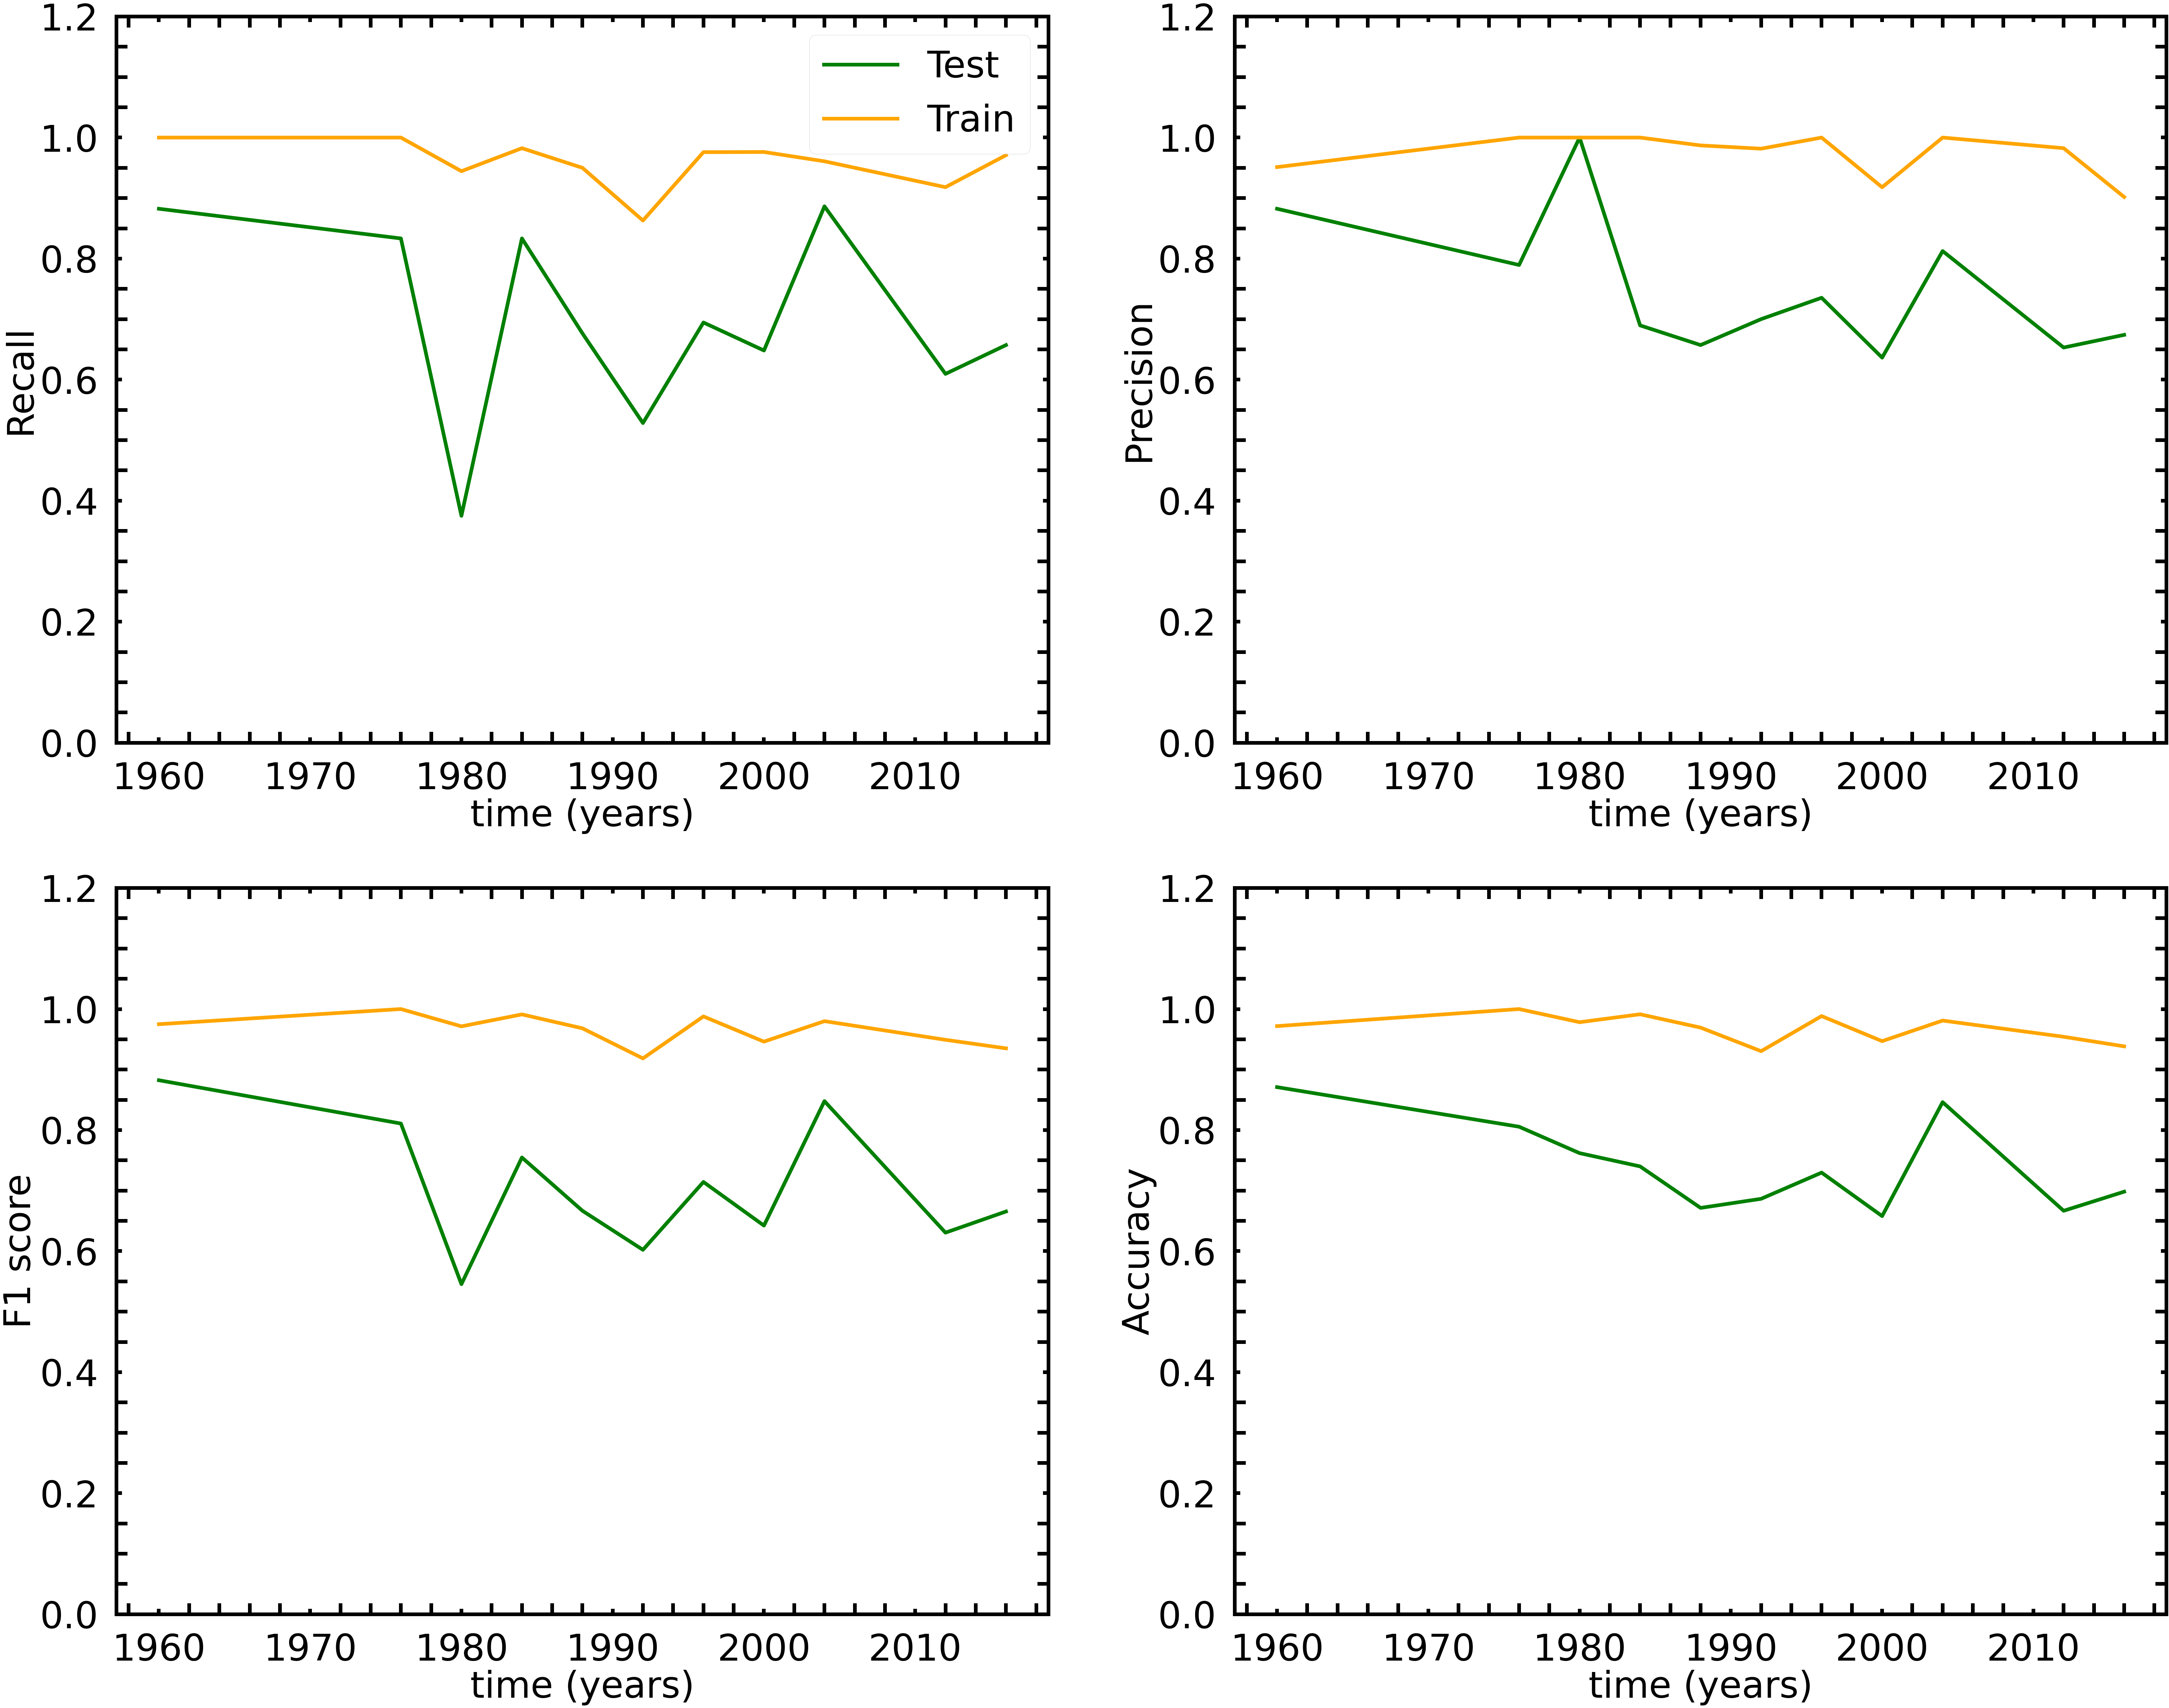

In [10]:
f = plt.figure(figsize=(100,80))

ft = 100
lw = 10
ltw = 15
ltwm= 30
pad_space=50
lz=100

ax1 = f.add_subplot(221)
ax1.plot(election_term,list(rc_rf.values()),c='g',linewidth=lw,label='Test')
ax1.plot(election_term,list(rc_tr_rf.values()),c='orange',linewidth=lw,label='Train')
ax1.set_ylabel('Recall',fontsize=ft)
ax1.set_xlabel('time (years)',fontsize=ft)
ax1.legend(fontsize=ft)
ax1.minorticks_on()
ax1.set_ylim([0,1.2])
ax1.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax1.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(lw)

ax2 = f.add_subplot(222)
ax2.plot(election_term,list(pr_rf.values()),c='g',linewidth=lw)
ax2.plot(election_term,list(pr_tr_rf.values()),c='orange',linewidth=lw)
ax2.set_ylabel('Precision',fontsize=ft)
ax2.set_xlabel('time (years)',fontsize=ft)
ax2.minorticks_on()
ax2.set_ylim([0,1.2])
ax2.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax2.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(lw)

ax3 = f.add_subplot(223)
ax3.plot(election_term,list(f1_rf.values()),c='g',linewidth=lw)
ax3.plot(election_term,list(f1_tr_rf.values()),c='orange',linewidth=lw)
ax3.set_ylabel('F1 score',fontsize=ft)
ax3.set_xlabel('time (years)',fontsize=ft)
ax3.minorticks_on()
ax3.set_ylim([0,1.2])
ax3.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax3.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax3.spines[axis].set_linewidth(lw)

ax4 = f.add_subplot(224)
ax4.plot(election_term,list(acc_rf.values()),c='g',linewidth=lw)
ax4.plot(election_term,list(acc_tr_rf.values()),c='orange',linewidth=lw)
ax4.set_ylabel('Accuracy',fontsize=ft)
ax4.set_xlabel('time (years)',fontsize=ft)
ax4.minorticks_on()
ax4.set_ylim([0,1.2])
ax4.tick_params(which='major',length=ltw,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
ax4.tick_params(which='minor',length=ltwm,width=lw,direction='in',labelsize=lz,axis='both',bottom=True,top=True,left=True,right=True,pad=pad_space)
for axis in ['top','bottom','left','right']:
        ax4.spines[axis].set_linewidth(lw)


In [11]:
pr_tr

{1960: 0.8863636363636364,
 1976: 0.8695652173913043,
 1980: 1.0,
 1984: 0.8620689655172413,
 1988: 0.9066666666666666,
 1992: 0.8979591836734694,
 1996: 0.9240506329113924,
 2000: 0.8962264150943396,
 2004: 0.9,
 2012: 0.898936170212766,
 2016: 0.8954128440366973}

In [32]:

!pip3 install scikit-learn==1.1
print(sklearn.__version__)

NameError: name 'sklearn' is not defined

In [30]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
print(scikit-learn.__version__)

NameError: name 'scikit' is not defined